# Project 4
Ruben Pena   
UN5550  
10/10/2018  
Due 10/14/2018  

In [1]:
import numpy as np
import pandas as pd
# Apparently Anaconda has a different mnist package than python-mnist
# https://github.com/datapythonista/mnist for info - anaconda developer
import mnist
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import neighbors, metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import scikitplot as skplt

In [2]:
from sklearn.svm import LinearSVC

In [3]:
# Anaconda minst loading(from dev page - The dataset is downloaded and cached in your temporary directory, so, calling the functions again, is much faster and doesn't hit the server)
X_train = mnist.train_images()
y_train = mnist.train_labels()
X_test = mnist.test_images()
y_test = mnist.test_labels()

In [4]:
# Shape of Training Set Predictors
X_train.shape

(60000, 28, 28)

In [5]:
# Shape of Training Set Targets
y_train.shape

(60000,)

In [6]:
# Shape of Test Set of Predictors
X_test.shape

(10000, 28, 28)

In [7]:
# Shape of Test Set of Targets
y_test.shape

(10000,)

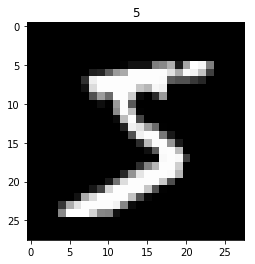

In [8]:
# Print of Training Set first element
plt.imshow(X_train[0], cmap='gray')
plt.title(y_train[0]);

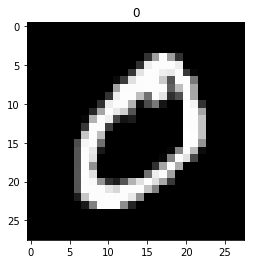

In [9]:
# Print Training Set second element
plt.imshow(X_train[1], cmap='gray')
plt.title(y_train[1]);

In [10]:
# Reshape training and test set predictors so they can be used in analysis
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))

In [11]:
# Confirm reshape
X_test.shape

(10000, 784)

In [12]:
X_train.shape

(60000, 784)

### In your own words, explain how the K nearest neighbor (KNN) algorithm works.

KNN is a supervised learning classifier that uses euclidean distance(some version of KNN) to find the nearest neighbors of a fixed point. It takes the class from K number of closest neighbors to that point and averages them to find the most likely class for that point. Using this "majority vote" among all the data in the set, KNN distinguishes classes.

### Develop python functions to compute the accuracy, sensitivity, specificity, precision and negative predictive value

In [13]:
# Function that accepts a confusion matrix and computes accuracy, sensitivity, specificity, precision, and negative predictive value(NPV)
# See sources at end of notebook
def deconfuse(cm):
    fp = cm.sum(axis=0) - np.diag(cm)
    fp = sum(fp)
    #sum columns of matrix - the diagonals
    fn = cm.sum(axis=1) - np.diag(cm)
    fn = sum(fn)
    #tps are all on diags
    tp = np.diag(cm)
    tp = sum(tp)
    #derive tn from the other values
    tn = cm.sum() - (fp + fn + tp)
    
    #Accuracy
    acc = (tp+tn)/(tp+fp+fn+tn)
    #Recall
    rcl = abs(tp)/(abs(tp)+abs(fn))
    #Specificity
    spc = abs(tn)/(abs(tn)+abs(fp))
    #Precision
    prc = abs(tp)/(abs(tp)+abs(fp))
    #Negative Predictive Value
    npv = abs(tn)/(abs(tn)+abs(fn))
    
    print("TP\tTN\tFN\tFP")
    print(tp,"\t", tn,"\t", fn,"\t", fp)
    print("Accuracy:\t ", acc)
    print("Recall:\t\t ", rcl)
    print("Specificity:\t ", spc)
    print("Precision:\t ", prc)
    print("NPV:\t\t ", npv)
    
     

### Apply a KNN Classifier with n_neighbors = {3,4,5}.   
#### For each model, compute the confusion matrix, as applied to the test set report the accuracy, sensitivity, specificity, precision and negative predictive value using your developed functions. compare the different models.

##### 3 Neighbors

In [14]:
# Create a knn classifier with 3 neighbors, train and fit to training data
knn3 = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train, y_train);

In [15]:
# predict against test data
predict3 = knn3.predict(X_test)

In [16]:
#calculate confusion matrix
cm3 = confusion_matrix(y_test, predict3)
cm3

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  10,    9,  996,    2,    0,    0,    0,   13,    2,    0],
       [   0,    2,    4,  976,    1,   13,    1,    7,    3,    3],
       [   1,    6,    0,    0,  950,    0,    4,    2,    0,   19],
       [   6,    1,    0,   11,    2,  859,    5,    1,    3,    4],
       [   5,    3,    0,    0,    3,    3,  944,    0,    0,    0],
       [   0,   21,    5,    0,    1,    0,    0,  991,    0,   10],
       [   8,    2,    4,   16,    8,   11,    3,    4,  914,    4],
       [   4,    5,    2,    8,    9,    2,    1,    8,    2,  968]],
      dtype=int64)

In [17]:
# run deconfuse function on confusion matrix
deconfuse(cm3)

TP	TN	FN	FP
9705 	 -295 	 295 	 295
Accuracy:	  0.941
Recall:		  0.9705
Specificity:	  0.5
Precision:	  0.9705
NPV:		  0.5


##### 4 Neighbors

In [18]:
# with 4 neighbors
knn4 = neighbors.KNeighborsClassifier(n_neighbors = 4)
knn4.fit(X_train, y_train);

In [19]:
predict4 = knn4.predict(X_test)

In [20]:
cm4 = confusion_matrix(y_test, predict4)

In [21]:
deconfuse(cm4)

TP	TN	FN	FP
9682 	 -318 	 318 	 318
Accuracy:	  0.9364
Recall:		  0.9682
Specificity:	  0.5
Precision:	  0.9682
NPV:		  0.5


##### 5 Neighbors

In [22]:
# 5 neighbors
knn5 = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn5.fit(X_train, y_train);

In [23]:
predict5 = knn5.predict(X_test)

In [24]:
cm5 = confusion_matrix(y_test, predict5)

In [25]:
deconfuse(cm5)

TP	TN	FN	FP
9688 	 -312 	 312 	 312
Accuracy:	  0.9376
Recall:		  0.9688
Specificity:	  0.5
Precision:	  0.9688
NPV:		  0.5


#### Comparison
- Recall - All recalls are nearly similar with N3 having slightly better results.   
- Precision - Precision for N4 and N5 are the same. N3 has slightly more precision.   
- Specificity - All specificity values are the same.   
- NPV - All NPV values are the same.    
- Accuracy - N4 and N5 have similar values. N3 scored slghtly higher in accuracy.   

#### Evaluation
All three of the models have very similar results. 3N appears to have slightly greater performance overall. As 3N should be the most computationally efficient model and has the highest accuracy it should be chosen over the others.

### Apply an SVM classifier. 

#### Again, report the confusion matrix, as well as the accuracy, sensitivity, specificity, precision and negative predictive value.

In [26]:
# Create a linear svm classifier and fit using training data
svm = LinearSVC()
svm.fit(X_train, y_train);

C:\Users\rpena\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [27]:
#Predicting on the Test Set
predict_svm = svm.predict(X_test)

In [28]:
# Compute confusion matrix on predictions vs test
cmSVM = confusion_matrix(y_test, predict_svm)

In [29]:
# Run deconfuse on confusion matrix from svm classifier
deconfuse(cmSVM)

TP	TN	FN	FP
8511 	 -1489 	 1489 	 1489
Accuracy:	  0.7022
Recall:		  0.8511
Specificity:	  0.5
Precision:	  0.8511
NPV:		  0.5


#### How does the SVM classifier compare to the KNN classifiers?
This classifier has less accuracy than all of the KNN classifiers, but better precision and recall. I initially tried using an RBF classifier, but after an hour of processing, I chose to try a different model.

* I noticed that the specificity and npv for all models was the same. I am not sure if this is due to an error in my function or if that is correct based on the model

##### Sources  
lucidv01d- https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal